In [2]:
from skimage.io import imread, imshow, imsave
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")

NEW_WIDTH = 256
NEW_HEIGHT = 170

def getLineTargetInfo(line):
    """
    Get the info of the line as a list of string
    """
    res = line.split(' ')
    for i in range(len(res)-1,0,-1):
        if (len(res[i]) == 0):
            res.pop(i)
    return res

def findBoxes(mask):
    """
    Find the boxes based on a mask
    """
    boxes = []
    shape = mask.shape
    for i in range(shape[0]):
        for j in range(shape[1]):
            if (mask[i,j] == 1):
                box = []
                x = j
                y = i
                w = 1
                h = 1
                while (x+w < shape[1] and mask[y,x+w] == 1):
                    w += 1
                while (y+h < shape[0] and mask[y+h,x] == 1):
                    h += 1
                box.append(x)
                box.append(y)
                box.append(w)
                box.append(h)
                boxes.append(box)
                mask[y:y+h,x:x+w] = 0
    return boxes

def createNewData(pathToImages, imagePath, targets, newImagesDirectory, newTargetFile):
    """
    Create the new data based on the original one
    """
    numberOfFaces = len(targets)
    image = imread(pathToImages+imagePath)
    shape = image.shape
    imageTarget = np.zeros((shape[0], shape[1]))
    for target in targets:
        x = target[0]
        y = target[1]
        w = target[2]
        h = target[3]
        imageTarget[y:y+h, x:x+w] = 1
    
    directory = newImagesDirectory+imagePath.split("/")[0]+"/"
    if (not os.path.isdir(directory)):
        os.mkdir(directory)
    newHeight = NEW_HEIGHT
    newWidth = NEW_WIDTH
    
    subImagesFactorX = shape[1]//NEW_WIDTH
    subImagesFactorY = shape[0]//NEW_HEIGHT
    
    ext = imagePath[-4:]
    name = newImagesDirectory+imagePath[:len(imagePath)-4]+"_"
    f = open(newTargetFile,"a")
    for i in range(subImagesFactorX-1):
        for j in range(subImagesFactorY-1):
            newImagePath = name+str(i)+"_"+str(j)+ext
            top = j*newHeight
            bottom = (j+1)*newHeight
            left = i*newWidth
            right = (i+1)*newWidth
            newImage = image[top:bottom, left:right,:]
            newImageTarget = imageTarget[top:bottom, left:right]
            listOfBoxes = findBoxes(newImageTarget)
            
            imsave(newImagePath,newImage)
            f.write(newImagePath+"\n")
            f.write(str(len(listOfBoxes))+"\n")
            for b in listOfBoxes:
                f.write(""+str(b[0])+" "+str(b[1])+" "+str(b[2])+" "+str(b[3])+"\n")
    f.close()

def createDirectories(listOfDirectories):
    """
    Create directories
    """
    for directory in listOfDirectories :
        if (not os.path.isdir(directory)):
            os.mkdir(directory) 

            

def writeNewDatabase(pathToImages, targetFile, numberOfImages, newPathToImages, newTargetFile):
    """
    Write a new database
    """
    f = open(targetFile)
    lines = f.read().splitlines()
    f.close()
    i = 0
    imageNumber = 0
    while ((imageNumber < numberOfImages or numberOfImages < 0) and i < len(lines)):
        path = lines[i]
        i+=1
        numberOfFaces = int(lines[i])
        targetInfos = []
        i+=1
        for j in range(numberOfFaces):
            line = lines[i]
            infoTargetFace = getLineTargetInfo(line)
            if (len(infoTargetFace) > 0):
                targetFace = list(map(int, infoTargetFace))
                targetInfos.append(targetFace)
            i+=1
        createNewData(pathToImages, path, targetInfos, newPathToImages, newTargetFile)
        imageNumber+=1
      
        
    
pathToImagesTrain = "WIDER FACE/WIDER_train/WIDER_train/images/"
pathToImagesVal = "WIDER FACE/WIDER_val/WIDER_val/images/"
targetFileTrain = "WIDER FACE/wider_face_split/wider_face_split/wider_face_train_bbx_gt.txt"
targetFileVal = "WIDER FACE/wider_face_split/wider_face_split/wider_face_val_bbx_gt.txt"
newPathToImagesTrain = "dataset/imagesTrain/"
newPathToImagesVal = "dataset/imagesVal/"
newTargetFileTrain = "dataset/targets/targetsTrain.txt"
newTargetFileVal = "dataset/targets/targetsVal.txt"
print("Start...")
createDirectories(["dataset", newPathToImagesTrain, newPathToImagesVal, "dataset/targets"])
writeNewDatabase(pathToImagesTrain, targetFileTrain, -1, newPathToImagesTrain, newTargetFileTrain)
print("...")
writeNewDatabase(pathToImagesVal, targetFileVal, -1, newPathToImagesVal, newTargetFileVal)
print("Done")
        

Start...


NameError: name 'newPathToImageVal' is not defined

(170, 256, 3)
(170, 256)
segmentedDatabase4v2/imagesTrain/0--Parade/0_Parade_marchingband_1_799_0_1.jpg
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


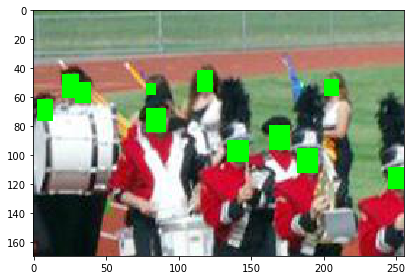

In [32]:
def createMask(boxes):
    res = np.zeros((NEW_HEIGHT, NEW_WIDTH))
    for b in boxes:
        res[b[1]:b[1]+b[3], b[0]:b[0]+b[2]] = 1
    return res

def merge(pic, mask):
    res = pic.copy()
    res[mask == 1] = [0,255,0]
    return res

f = open("dataset/targets/targetsTrain.txt")
lines = f.read().splitlines()
f.close()
name = ""
i = 0
boxes = []
while (i < len(lines)):
    line = lines[i]
    name = line
    i += 1
    line = lines[i]
    number = int(line)
    i+=1
    if (number > 0):
        if (number > 2):
            for j in range(number):
                info = getLineTargetInfo(lines[i])
                box = list(map(int, info))
                boxes.append(box)
                i += 1
            break
        else:
            i+=1

image = imread(name)
print(image.shape)
mask = createMask(boxes)
print(mask.shape)
print(name)
print(mask)
newIm = merge(image, mask)
imshow(newIm)
